## 1. Load dataset and identify text fields to analyze

In [109]:
# Change current directory to desktop
# This isn't necessary for any of the analysis, but makes it easy to see and find file outputs
# Change this to whatever directory works for you if your desktop is a horror show
import os
cwd = os.getcwd()
print('Working in ', cwd, '\n')

data_file = "rfi-data.tsv"

# Prefix output files with TSV filename prefix—-these will be saved to your desktop
file_prefix = data_file.split('.')
file_prefix = file_prefix[0]+'_'
print('\nFile exports will be prefixed with:', file_prefix)

Working in  c:\Uni\11.First00\Linear.Algebra\Project\code\nlp-text-analysis-master 


File exports will be prefixed with: rfi-data_


In [110]:
# Load the dataset and view sample data and column headers
import pandas
dataset = pandas.read_csv(data_file, delimiter = '\t')
dataset.head()

,id,date,question
0,495996901,2019-04-21 8:38:01,Hello there I'm from iran looking for admissio...
1,519163216,2019-07-10 12:58:12,"Hello,My name is. Currently, I am a second-yea..."
2,447835205,2018-10-19 11:57:30,Could you give me more information on agronomy...
3,428788128,2018-08-01 23:31:43,"Dear, I am a Brazilian student and would like ..."
4,496056002,2019-04-21 19:22:45,Hello my name is and I've recently enrolled to...


In [111]:
# View 10 most common words prior to text pre-processing
datacol = "question"
freq = pandas.Series(' '.join(map(str, dataset[datacol])).split()).value_counts()[:10]
freq

to      302
I       269
the     259
a       177
in      162
you     160
for     155
and     146
have    114
Do       98
dtype: int64

In [112]:
# View 10 least common words prior to text pre-processing
freq1 =  pandas.Series(' '.join(map(str,dataset 
         [datacol])).split()).value_counts()[-10:]
freq1

enrolling,     1
Before         1
start?         1
eventually.    1
diploma,       1
sometime       1
quite          1
course.        1
EVERYTHING     1
autocad?       1
dtype: int64

## 2. Create a list of stop words

In [113]:
# Import libraries for text preprocessing
import re
import nltk

# You only need to download these resources once. After you run this 
# the first time--or if you know you already have these installed--
# you can comment these two lines out (with a #)
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [115]:
# Load a set of custom stop words from a text file (one stopword per line)
csw = set(line.strip() for line in open('custom-stopwords.txt'))
csw = [sw.lower() for sw in csw]
print(sorted(csw))

['hello', 'thank', 'wondering', 'would']


In [116]:
# Combine custom stop words with stop_words list
stop_words = stop_words.union(csw)
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'hello', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so'

## 3. Pre-process the dataset to get a cleaned, normalized text corpus  

In [117]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [118]:
#View sample pre-processed corpus item
i = 0
print("Sentence :\t\t",        str(dataset[datacol][i]))
print("Extracted Corpuses :\t",corpus[i])

Sentence :		 Hello there I'm from iran looking for admission in Regional college to get degree.
Extracted Corpuses :	 iran looking admission regional college get degree


In [119]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [120]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['iran',
 'looking',
 'admission',
 'regional',
 'college',
 'get',
 'degree',
 'iran looking',
 'looking admission',
 'admission regional']

## 4. Extract most frequently occurring keywords and n-grams

        Keyword  Frequency
0       program        108
1         class         87
2       student         70
3        course         62
4       college         52
5        school         48
6          take         48
7   information         46
8          year         45
9        online         42
10         need         40
11         like         38
12       degree         37
13        offer         37
14          get         35
15       credit         30
16        apply         30
17        could         28
18     regional         27
19       please         27


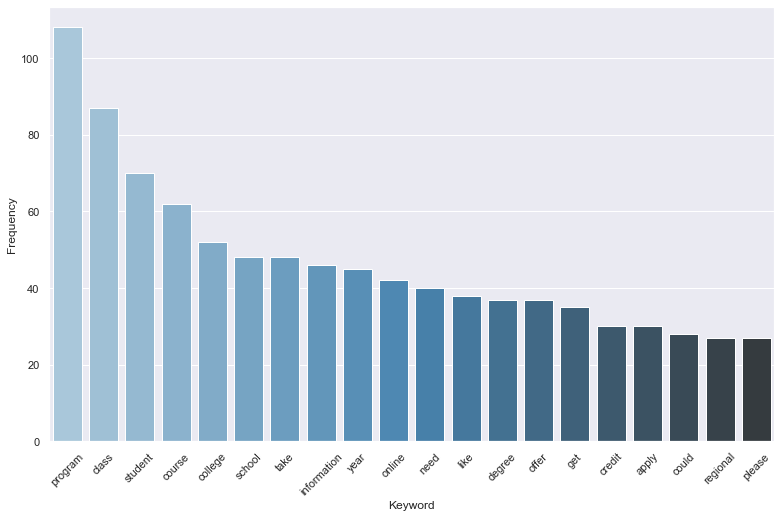

In [126]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight",dpi=500)

                  Bi-gram  Frequency
0       community college         19
1   international student         16
2                dear sir         15
3             high school         10
4      regional community         10
5              take class         10
6          placement test         10
7               sir madam         10
8               need take          9
9           financial aid          8
10         dental hygiene          8
11        bachelor degree          7
12            please send          7
13             please let          7
14               let know          7
15              like know          6
16        hygiene program          6
17           fall quarter          6
18              full time          5
19        nursing program          5


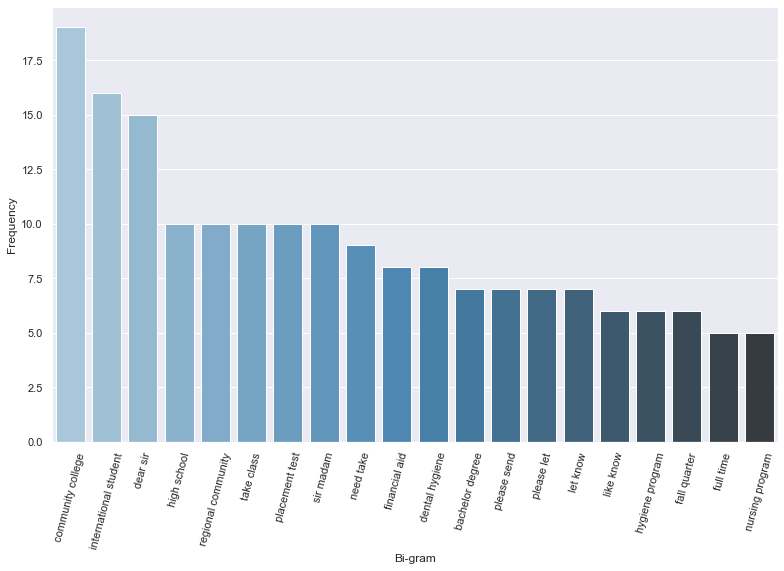

In [127]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight",dpi=500)

                             Tri-gram  Frequency
0                      dear sir madam         10
1          regional community college          9
2                     please let know          7
3              dental hygiene program          6
4                     able take class          3
5                 currently full time          3
6           early childhood education          3
7                 take placement test          3
8                  scc student number          3
9              could give information          2
10                   post bac program          2
11             community college long          2
12                  program able take          2
13          another community college          2
14                    need take class          2
15  application international student          2
16                     lpn rn program          2
17                    class need take          2
18                      tai chi class          2
19                  

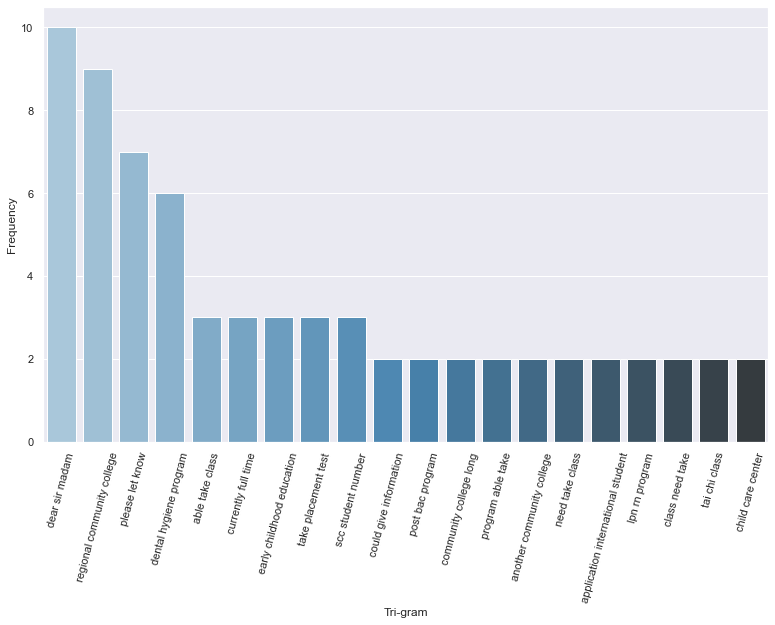

In [123]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig(file_prefix + "_tri-gram.png", bbox_inches = "tight",dpi=500)


## 5. Extract a list of top TF-IDF terms

In [124]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents

from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

C:\Program Files\Python385\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [125]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

import csv
with open(file_prefix + 'td_idf.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(["Keyword", "Importance"])
    for key, value in keywords.items():
       writer.writerow([key, value])


Abstract:
perhaps program somewhere along line teach blueprint reading autocad

Keywords:
teach blueprint reading 0.21
teach blueprint 0.21
teach 0.21
somewhere along line 0.21
somewhere along 0.21
somewhere 0.21
reading autocad 0.21
reading 0.21
program somewhere along 0.21
program somewhere 0.21
perhaps program somewhere 0.21
perhaps program 0.21
line teach blueprint 0.21
line teach 0.21
blueprint reading autocad 0.21
blueprint reading 0.21
blueprint 0.21
along line teach 0.21
along line 0.21
along 0.21
perhaps 0.196
line 0.196
autocad 0.196
program 0.08
